Data Source:
https://www.kaggle.com/wsj/college-salaries

Original Source: WSJ

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
degree_data = pd.read_csv('degrees-that-pay-back.csv')

In [3]:
degree_data.head()

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Accounting,"$46,000.00","$77,100.00",67.6,"$42,200.00","$56,100.00","$108,000.00","$152,000.00"
1,Aerospace Engineering,"$57,700.00","$101,000.00",75.0,"$64,300.00","$82,100.00","$127,000.00","$161,000.00"
2,Agriculture,"$42,600.00","$71,900.00",68.8,"$36,300.00","$52,100.00","$96,300.00","$150,000.00"
3,Anthropology,"$36,800.00","$61,500.00",67.1,"$33,800.00","$45,500.00","$89,300.00","$138,000.00"
4,Architecture,"$41,600.00","$76,800.00",84.6,"$50,600.00","$62,200.00","$97,000.00","$136,000.00"


### Which Major is the most lucratic after graduation...? (Both short run and long term)

In [7]:
# We can see that columns that are supposed to be numbers are objects, so we need to wrangle their data types into numbers
degree_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
Undergraduate Major                                  50 non-null object
Starting Median Salary                               50 non-null object
Mid-Career Median Salary                             50 non-null object
Percent change from Starting to Mid-Career Salary    50 non-null float64
Mid-Career 10th Percentile Salary                    50 non-null object
Mid-Career 25th Percentile Salary                    50 non-null object
Mid-Career 75th Percentile Salary                    50 non-null object
Mid-Career 90th Percentile Salary                    50 non-null object
dtypes: float64(1), object(7)
memory usage: 3.2+ KB


In [8]:
dollar_sign_cols = ['Starting Median Salary','Mid-Career Median Salary','Mid-Career 10th Percentile Salary',
                    'Mid-Career 25th Percentile Salary','Mid-Career 75th Percentile Salary','Mid-Career 90th Percentile Salary']

for x in dollar_sign_cols:
    degree_data[x] = degree_data[x].str.replace("$","")
    degree_data[x] = degree_data[x].str.replace(",","")
    degree_data[x] = pd.to_numeric(degree_data[x])

In [9]:
# Data Type problem fixed! And no missing data as well!
degree_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
Undergraduate Major                                  50 non-null object
Starting Median Salary                               50 non-null float64
Mid-Career Median Salary                             50 non-null float64
Percent change from Starting to Mid-Career Salary    50 non-null float64
Mid-Career 10th Percentile Salary                    50 non-null float64
Mid-Career 25th Percentile Salary                    50 non-null float64
Mid-Career 75th Percentile Salary                    50 non-null float64
Mid-Career 90th Percentile Salary                    50 non-null float64
dtypes: float64(7), object(1)
memory usage: 3.2+ KB


In [10]:
degree_data.head()

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Accounting,46000.0,77100.0,67.6,42200.0,56100.0,108000.0,152000.0
1,Aerospace Engineering,57700.0,101000.0,75.0,64300.0,82100.0,127000.0,161000.0
2,Agriculture,42600.0,71900.0,68.8,36300.0,52100.0,96300.0,150000.0
3,Anthropology,36800.0,61500.0,67.1,33800.0,45500.0,89300.0,138000.0
4,Architecture,41600.0,76800.0,84.6,50600.0,62200.0,97000.0,136000.0


In [22]:
def degree_data_max_major(col):
    """Extracts part of the dataframe that contains the major with the highest salary
    for the particular column name category entered
    Input: COL NAME
    Output: DATAFRAME
    """
    return degree_data[degree_data[col]==max(degree_data[col])]

In [31]:
degree_data_max_major('Starting Median Salary').append(degree_data_max_major('Mid-Career Median Salary')).\
append(degree_data_max_major('Percent change from Starting to Mid-Career Salary')).reset_index().\
join(pd.DataFrame(['Max Starting Median Salary', 'Max Mid-Career Median Salary',
                             'Max Percent Change from Starting to Mid-Career Salary', 
                             'Max Percent Change from Starting to Mid-Career Salary'],
                  columns=['Max Category'])).drop(['index'], axis=1)

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary,Max Category
0,Physician Assistant,74300.0,91700.0,23.4,66400.0,75200.0,108000.0,124000.0,Max Starting Median Salary
1,Chemical Engineering,63200.0,107000.0,69.3,71900.0,87300.0,143000.0,194000.0,Max Mid-Career Median Salary
2,Math,45400.0,92400.0,103.5,45200.0,64200.0,128000.0,183000.0,Max Percent Change from Starting to Mid-Career...
3,Philosophy,39900.0,81200.0,103.5,35500.0,52800.0,127000.0,168000.0,Max Percent Change from Starting to Mid-Career...


We can see from the resulting Dataframe above that the undergraduate major that has the higest starting median salary is "Physician Assistant". For highest mid-career median salary, it's chemical engineering. It's higher than that of Physician Assistant majors. I guess this shows engineering majors may not start off as the highest paying but end up surpassing median salaries of other majors in people's mid career. Finally, the percent change from starting to mid-career salary is the highest for math and philosophy majors. Pure academic majors (no practical applications) like math and philsophy bring low salaries at first but salary growth is higher than other majors in the long run.

In [32]:
def degree_data_min_major(col):
    """Extracts part of the dataframe that contains the major with the lowest salary
    for the particular column name category entered
    Input: COL NAME
    Output: DATAFRAME
    """
    return degree_data[degree_data[col]==min(degree_data[col])]

In [34]:
degree_data_min_major('Starting Median Salary').append(degree_data_min_major('Mid-Career Median Salary')).\
append(degree_data_min_major('Percent change from Starting to Mid-Career Salary')).reset_index().\
join(pd.DataFrame(['Min Starting Median Salary', 'Min Mid-Career Median Salary',
                             'Min Mid-Career Median Salary', 
                             'Min Percent Change from Starting to Mid-Career Salary'],
                  columns=['Min Category'])).drop(['index'], axis=1)

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary,Min Category
0,Spanish,34000.0,53100.0,56.2,31000.0,40000.0,76800.0,96400.0,Min Starting Median Salary
1,Education,34900.0,52000.0,49.0,29300.0,37900.0,73400.0,102000.0,Min Mid-Career Median Salary
2,Religion,34100.0,52000.0,52.5,29700.0,36500.0,70900.0,96400.0,Min Mid-Career Median Salary
3,Physician Assistant,74300.0,91700.0,23.4,66400.0,75200.0,108000.0,124000.0,Min Percent Change from Starting to Mid-Career...


Spanish majors receive the lowest starting median salary. Education and religion majors receive the lowest mid-career median salary. Interestingly, physician assistant majors that have the highest starting median salary has the lowest percent change from starting to mid-career salary. This means salary growth of physician assistant majors is the lowest and therefore we can't really expect bright long term prospects.

Let's look at some visualizations for the entire list of majors

In [35]:
degree_data_starting_sorted = degree_data.sort_values(by='Starting Median Salary', ascending=False).reset_index()

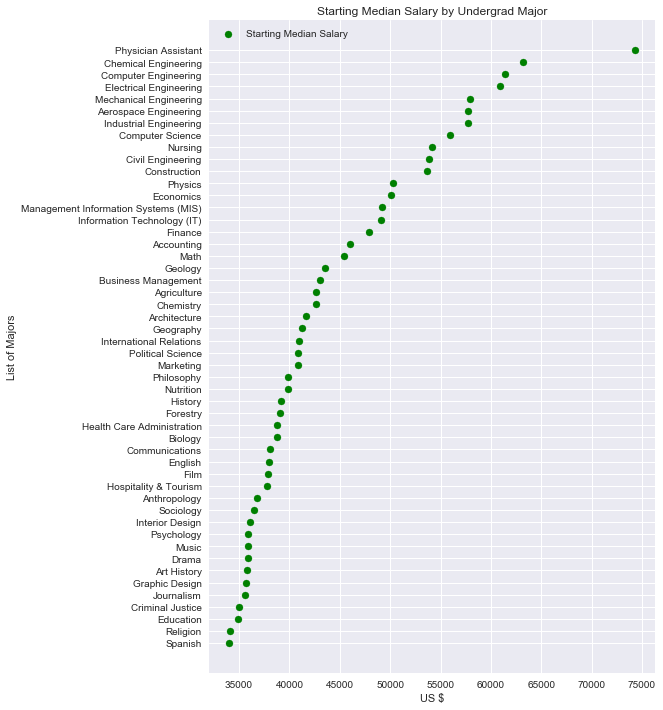

In [37]:
# Scatter Graph sorted by starting median salary
fig = plt.figure(figsize=(8,12))

x = degree_data_starting_sorted['Starting Median Salary']
y = len(degree_data_starting_sorted.index) - degree_data_starting_sorted.index
labels = degree_data_starting_sorted['Undergraduate Major']

plt.scatter(x, y, color='g', label = 'Starting Median Salary')
plt.yticks(y, labels)

plt.xlabel('US $')
plt.ylabel('List of Majors')
plt.title('Starting Median Salary by Undergrad Major')
plt.legend(loc=2)

Let's graph this again with horizontal bar charts

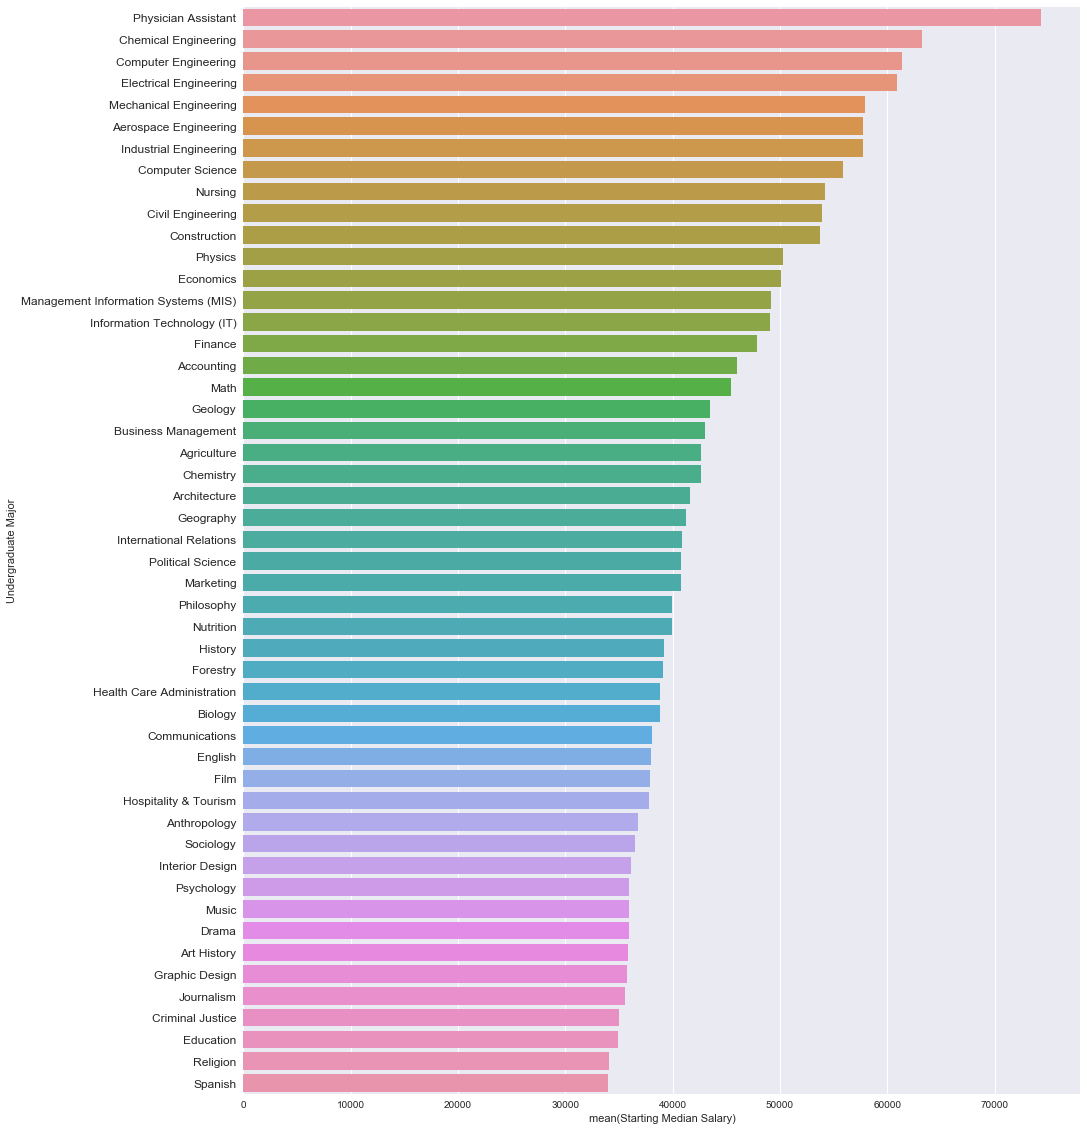

In [45]:
f, ax = plt.subplots(figsize=(15, 20)) 
ax.set_yticklabels(degree_data_starting_sorted['Undergraduate Major'], rotation='horizontal', fontsize='large')
sns.barplot(y = degree_data_starting_sorted['Undergraduate Major'], x= degree_data_starting_sorted['Starting Median Salary'])

We can see from the above visualization that various engineering majors, computer science, physician assistant and nursing majors receive the higest starting median salaries. Next in line are economics, physics, Finance, Accounting and IT majors. Education, religion and Spanish majors receive the lowest starting median salaries.

In [38]:
degree_data_midcareer_sorted = degree_data.sort_values(by='Mid-Career Median Salary', ascending=False).reset_index()

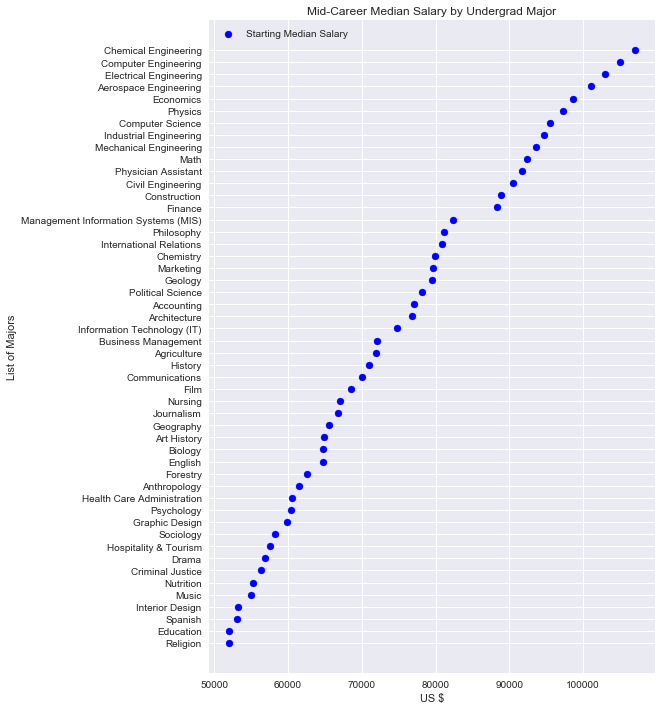

In [40]:
# Scatter Graph sorted by mid-career median salary
fig = plt.figure(figsize=(8,12))

x = degree_data_midcareer_sorted['Mid-Career Median Salary']
y = len(degree_data_midcareer_sorted.index) - degree_data_midcareer_sorted.index
labels = degree_data_midcareer_sorted['Undergraduate Major']

plt.scatter(x, y, color='b', label = 'Starting Median Salary')
plt.yticks(y, labels)

plt.xlabel('US $')
plt.ylabel('List of Majors')
plt.title('Mid-Career Median Salary by Undergrad Major')
plt.legend(loc=2)

Let's graph this again with horizontal bar charts

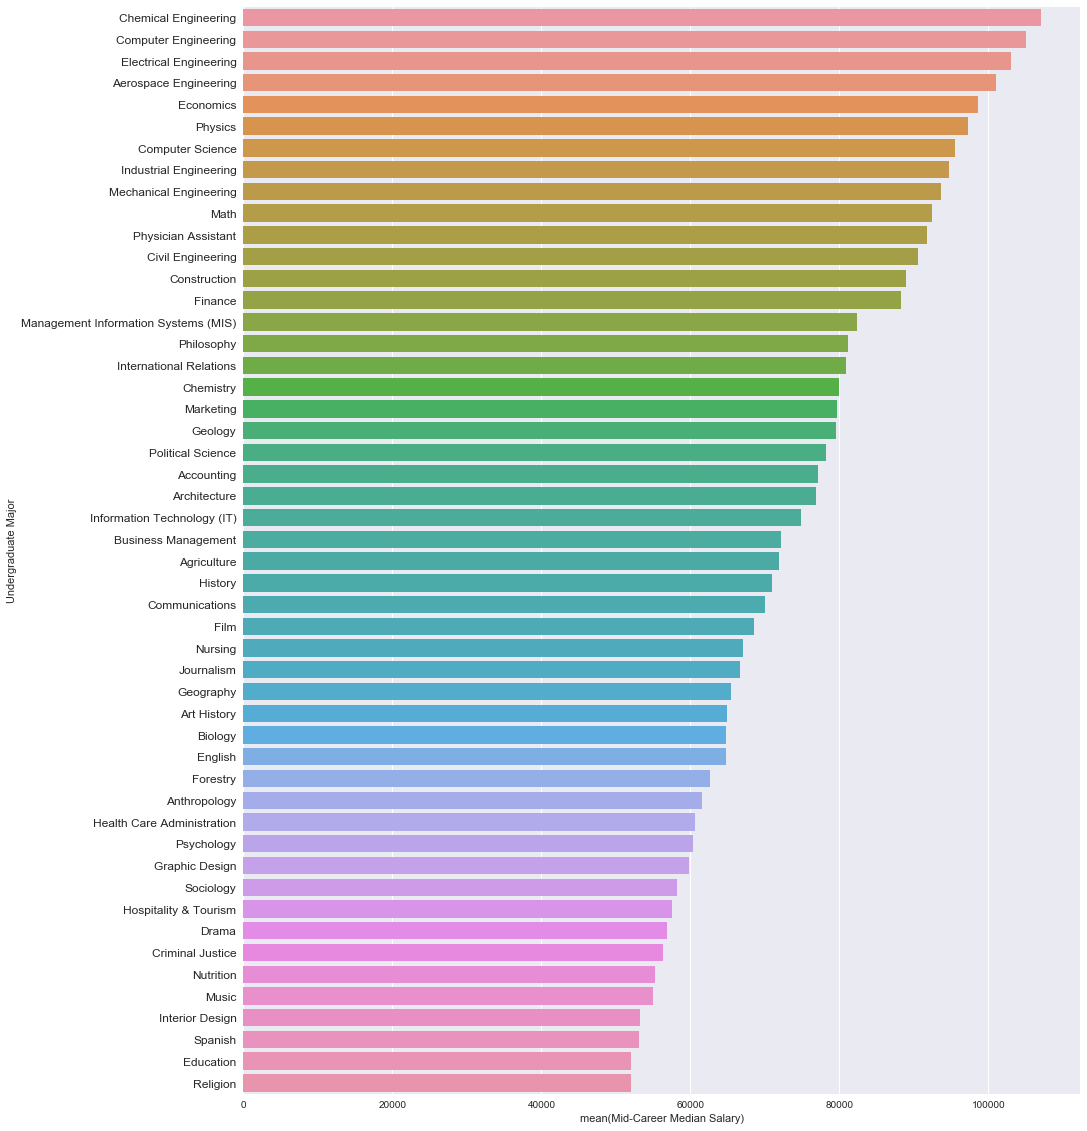

In [46]:
f, ax = plt.subplots(figsize=(15,20)) 
ax.set_yticklabels(degree_data_midcareer_sorted['Undergraduate Major'], rotation='horizontal', fontsize='large')
sns.barplot(y = degree_data_midcareer_sorted['Undergraduate Major'], x= degree_data_midcareer_sorted['Mid-Career Median Salary'])

Interesting things we need to look out in the above graph is the shift in some of the rankings. While most of the engineering majors still stay on the top of the list for highest mid-career median salaries, industrial and mechanical engineering majors allowed economics, physics and computer science majors to surpass them. Also, math and philsophy majors climbed up some rankings which corresponds to our findings above that math and philsophy majors had the highest percentage increase from starting to mid-career salaries. Lastly, nursing, which used to have one of the highest paying starting salary plummeted to the lowest quartile of rankings for mid-career median salary.

### Interactive Graph with starting and mid-career salaries & % change increase

In [50]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as grpob
import plotly.tools as tls
import plotly.figure_factory as ff
import matplotlib.colors as colors

In [55]:
# Top 20 majors with highest mid career salaries
majors_sort = degree_data_midcareer_sorted.head(20)

def cut_name(x):
    if len(x) <= 18:
        return x
    else:
        return x[0:15] + "..."

trace1 = grpob.Bar(
    x = majors_sort["Undergraduate Major"].apply(cut_name).tolist(),
    y = majors_sort["Starting Median Salary"].tolist(),
    name='Starting',
    marker=dict(
        color='rgba(55, 128, 191, 0.7)',
        line=dict(
            color='rgba(55, 128, 191, 1.0)',
            width=2,
        )
    )
)

trace2 = grpob.Bar(
    x = majors_sort["Undergraduate Major"].apply(cut_name).tolist(),
    y = majors_sort["Mid-Career Median Salary"].tolist(),
    name='Mid-Career',
    marker=dict(
        color='rgba(219, 64, 82, 0.7)',
        line=dict(
            color='rgba(219, 64, 82, 1.0)',
            width=2,
        )
    )
)

trace3 = grpob.Scatter(
    x = majors_sort["Undergraduate Major"].apply(cut_name).tolist(),
    y = majors_sort["Percent change from Starting to Mid-Career Salary"].tolist(),
    name='Percent change',
    mode = 'markers',
    marker=dict(
        symbol="hexagon-dot",
        size=15
    ),
    yaxis='y2'
)

data = [trace1, trace2, trace3]
layout = grpob.Layout(
    barmode='group',
    title = 'Comparison between starting and mid-career salaries: % change',
    width=850,
    height=500,
    margin=go.Margin(
        l=75,
        r=75,
        b=120,
        t=80,
        pad=10
    ),
    paper_bgcolor='rgb(244, 238, 225)',
    plot_bgcolor='rgb(244, 238, 225)',
    yaxis = dict(
        title= 'Median Salary [$]',
        anchor = 'x',
        rangemode='tozero'
    ),   
    yaxis2=dict(
        title='Change [%]',
        titlefont=dict(
            color='rgb(148, 103, 189)'
        ),
        tickfont=dict(
            color='rgb(148, 103, 189)'
        ),
        overlaying='y',
        side='right',
        anchor = 'x',
        rangemode = 'tozero',
        dtick = 19.95
    ),
    #legend=dict(x=-.1, y=1.2)
    legend=dict(x=0.1, y=0.05)
)

fig = grpob.Figure(data=data, layout=layout)
py.iplot(fig)